# https://www.tensorflow.org/tutorials/keras/basic_classification?hl=pt-br

In [1]:
#for amd gpu https://rustyonrampage.github.io/deep-learning/2018/10/18/tensorfow-amd.html
import plaidml.keras
plaidml.keras.install_backend()

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

In [5]:
print('Formato dos arrays:')
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

Formato dos arrays:
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
print('Breve olhada na linha 0 coluna 0 para entender os arrays')
print(trainX[0][0])
print('Label:', trainY[0])

Breve olhada na linha 0 coluna 0 para entender os arrays
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Label: 9


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Visualizando


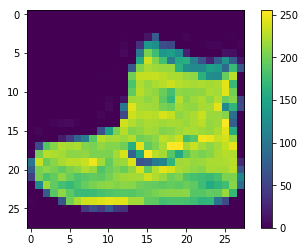

In [8]:
print('Visualizando')
plt.figure()
plt.imshow(trainX[0])
plt.colorbar()
plt.show()

In [9]:
trainX = trainX / 255.0
testX = testX / 255.0

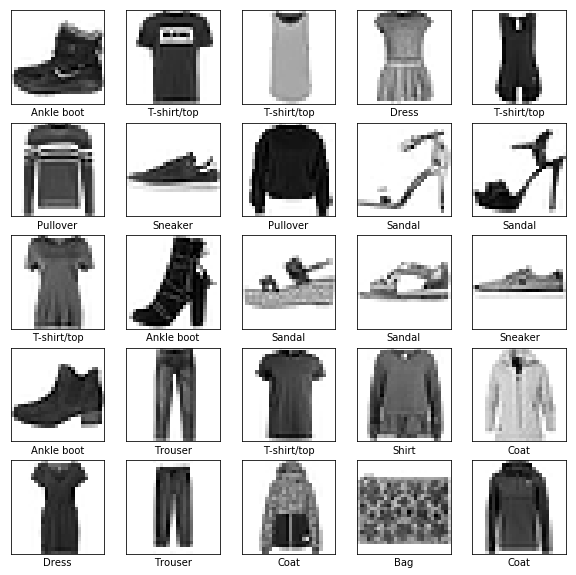

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()


In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.fit(trainX, trainY, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.5027 - acc: 0.8225
Epoch 2/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3774 - acc: 0.8633
Epoch 3/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3379 - acc: 0.8770
Epoch 4/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3136 - acc: 0.8847
Epoch 5/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2957 - acc: 0.8907


In [13]:
test_loss, test_acc = model.evaluate(testX, testY)
print('Acurácia: ', test_acc)

10000/10000 [==============================] - 1s 67us/sample - loss: 0.3438 - acc: 0.8771
Acurácia:  0.8771


In [14]:
predictions = model.predict(testX)
np.argmax(predictions[0])

9

In [15]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


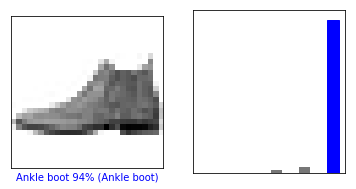

In [16]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, testY, testX)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  testY)
plt.show()


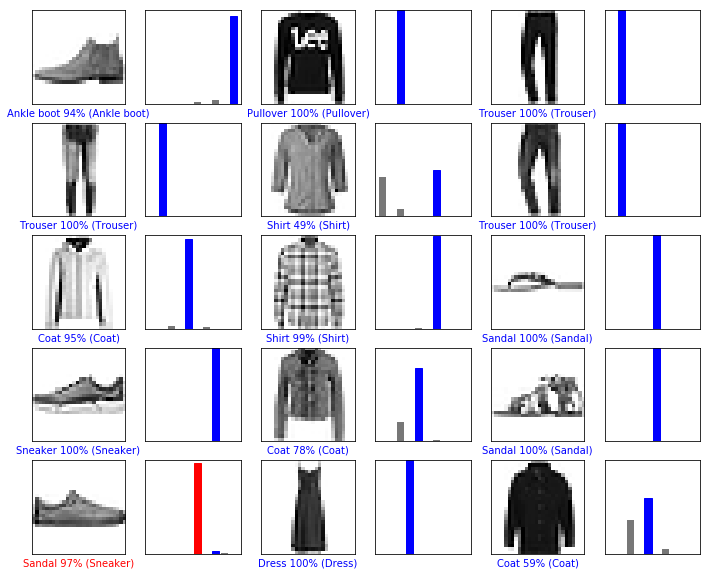

In [17]:
#previsões
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, testY, testX)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, testY)
plt.show()
